# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


# EDA Project - Laptop sales

<div>
<img src="images/dataset-cover.png" width="400"/>
</div>


1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Outliers](#section1.3)    
   1.4 [Transformations](section1.4)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)
4. [Categorical data](#section4)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

We'll work with a marketing of Laptops dataset, taken from [Flipkaet](flipkart.com)

Based on the example [here](https://www.kaggle.com/jennifercrockett/marketing-analytics-eda-task-final)

In [2]:
id1 = "316087337"
id2 = "209056225"
id3 = "208685842"
id4 = "208006965"

In [3]:
url = 'https://raw.githubusercontent.com/NoaBarNov/Data-Science/main/Cleaned_Laptop_data.csv'
data_comp = pd.read_csv(url)

In [4]:
data = data_comp.copy()

In [5]:
data.shape

(896, 23)

In [6]:
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15


# Wrangling data

#### 1.1 Fix columns

In [7]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

#### 1.2 Missing values

In [8]:
data.isnull().sum().sort_values(ascending=False)

ram_gb             25
ram_type           25
processor_name      1
brand               0
display_size        0
ratings             0
star_rating         0
discount            0
old_price           0
latest_price        0
msoffice            0
Touchscreen         0
warranty            0
graphic_card_gb     0
weight              0
model               0
os_bit              0
os                  0
hdd                 0
ssd                 0
processor_gnrtn     0
processor_brand     0
reviews             0
dtype: int64

Replacing missing to NaN's for conveniency

In [9]:
data = data.replace('Missing' , np.nan)

In [10]:
data.isnull().sum().sort_values(ascending=False)

processor_gnrtn    314
os                  72
ram_gb              25
ram_type            25
processor_name       1
brand                0
warranty             0
ratings              0
star_rating          0
discount             0
old_price            0
latest_price         0
msoffice             0
Touchscreen          0
graphic_card_gb      0
display_size         0
weight               0
model                0
os_bit               0
hdd                  0
ssd                  0
processor_brand      0
reviews              0
dtype: int64

לבדוק ש25 בשתי ההעמודות הם לא אותן השורות

In [11]:
data[(data['ram_gb'].values == np.nan) & (data['ram_type'].values == np.nan)]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews


##### Fixing processor generator column

<AxesSubplot:xlabel='processor_gnrtn', ylabel='Percent'>

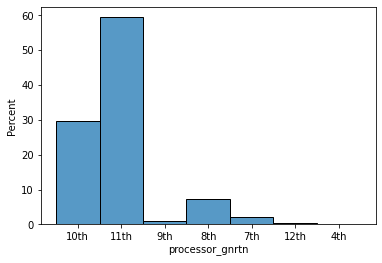

In [12]:
sns.histplot(data = data, x= 'processor_gnrtn', stat = 'percent')

להחליט אם לרשום פה משהו לגבי הכנסת ערכים חסרים, אולי להגיד שאין פה חוקיות כי שליש מהערכים חסרים

<div>
<img src="images/red.png" width="100"/>
</div>

##### Fixing operation system column

In [13]:
data['os'].isnull().sum()

72

In [14]:
data.os.unique()

array(['Windows', 'Mac', nan], dtype=object)

<AxesSubplot:xlabel='os', ylabel='Percent'>

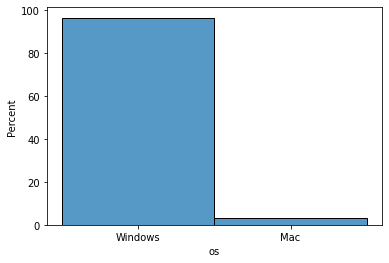

In [15]:
sns.histplot(data = data, x= 'os', stat = 'percent')
#לכתוב למטה operation system

we can see that most of the computers contains Windows opration system so we will replace the missing values with windows values (לא ישנה את הסטטיסטיקה)

In [16]:
data['os'] = data['os'].fillna('Windows')

In [17]:
data.os.unique()

array(['Windows', 'Mac'], dtype=object)

In [18]:
data['os'].isnull().sum()

0

##### Fixing ram_gb column

In [19]:
data['ram_gb'].isnull().sum()

25

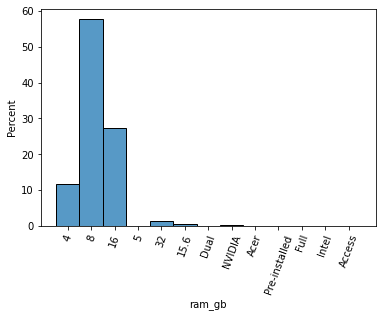

In [20]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

only 0.02% of the data is NaN so we will convert the missing data to the most common gb - 8

In [21]:
data['ram_gb'] = data['ram_gb'].fillna('8')

In [22]:
data['ram_gb'].unique()

array(['4', '8', '16', '5', '32', '15.6', 'Dual', 'NVIDIA', 'Acer',
       'Pre-installed', 'Full', 'Intel', 'Access'], dtype=object)

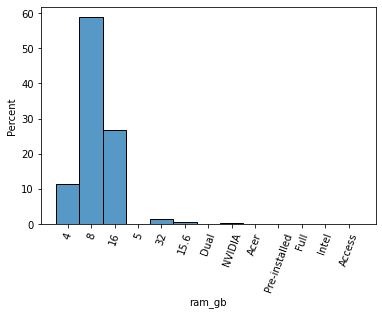

In [23]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

##### Fixing ram_type column

In [24]:
data['ram_type'].isnull().sum()

25

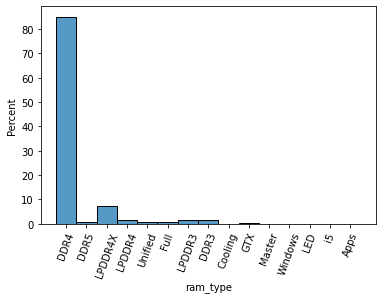

In [25]:
sns.histplot(data = data, x= 'ram_type', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

only 0.02% of the data is NaN so we will convert the missing data to the most common DDR4

In [26]:
data['ram_type'] = data['ram_type'].fillna('DDR4')

In [27]:
data['ram_type'].isnull().sum()

0

##### Fixing processor_name column

In [28]:
data['processor_name'].isnull().sum()

1

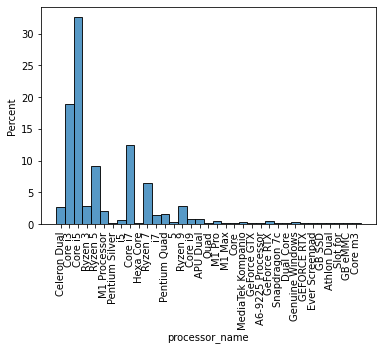

In [29]:
sns.histplot(data = data, x= 'processor_name', stat = 'percent')
plt.xticks(rotation = 90)
plt.show()

we dicided to drop it out because we cant להסיק where it might belong

In [30]:
data = data.dropna(subset = ['processor_name'])

In [31]:
data['processor_name'].isnull().sum()

0

#### 1.3 Noisy data - outliers

We choose only the numeric data because we want to see it in boxplot

Select only numeric columns:

In [32]:
data.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                  int64
hdd                  int64
os                  object
os_bit               int64
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price         int64
old_price            int64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [33]:
#features = ['ram_gb','Year_Birth', 'Income', 'Kidhome', 'Teenhome','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth' ]

#### 1.4 Transformations

#### 2 Understanding the data

ram_gb column

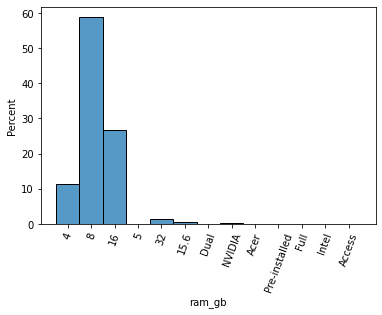

In [34]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')
plt.xticks(rotation = 70)
plt.show()

we can see that there are some wrong data that got in the column so we will drop out the wrong rows
15.6 is screen size
also, Dual, NVIDIA, Acer, intel is companies

we will find the rows that we aren't sure about them
5, Pre-installed, Full, Access

In [35]:
data[(data['ram_gb'].values == 'Pre-installed') | (data['ram_gb'].values == 'Full') | (data['ram_gb'].values == 'Access') | (data['ram_gb'].values == '5')]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
21,acer,Aspire,Intel,i5,NaN,5,DDR5,0,0,Windows,...,0,0,No,No,50990,89999,43,4.4,10966,1185
710,MSI,GS,512,GB SSD,NaN,Pre-installed,Windows,0,0,Windows,...,8th,0,No,No,149990,169990,11,4.1,10,3
769,Lenovo,Legion,Pre-installed,Genuine Windows,NaN,Full,LED,0,0,Windows,...,0,0,No,No,77890,110890,29,4.4,208,57
846,HP,Chromebook,64,GB eMMC,NaN,Access,Apps,0,0,Windows,...,0,0,No,No,61745,0,0,4.6,23,4


we will drop the folowing rows because we can see false information also in cloumn processor_brand.
בשורות שיש להם ערכים מספריים בעמודה של המותג. 

In [36]:
dorp_preinstalled_index = data.loc[data.ram_gb == 'Pre-installed'].index
dorp_access_index = data.loc[data.ram_gb == 'Access'].index
dorp_156_index = data.loc[data.ram_gb == '15.6'].index
dorp_5_index = data.loc[data.ram_gb == '5'].index
dorp_dual_index = data.loc[data.ram_gb == 'Dual'].index
dorp_nvidia_index = data.loc[data.ram_gb == 'NVIDIA'].index
dorp_acer_index = data.loc[data.ram_gb == 'Acer'].index
dorp_intel_index = data.loc[data.ram_gb == 'Intel'].index
data.drop(dorp_preinstalled_index,inplace = True)
data.drop(dorp_access_index,inplace = True)
data.drop(dorp_156_index,inplace = True)
data.drop(dorp_dual_index,inplace = True)
data.drop(dorp_nvidia_index,inplace = True)
data.drop(dorp_acer_index,inplace = True)
data.drop(dorp_intel_index,inplace = True)
data.drop(dorp_5_index,inplace = True)

In [37]:
data.shape

(881, 23)

<AxesSubplot:xlabel='ram_gb', ylabel='Percent'>

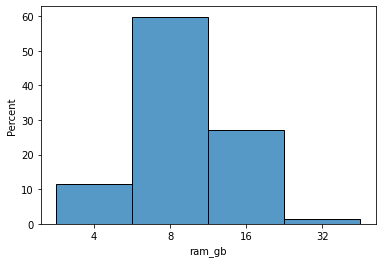

In [43]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')

we will convert the column 'ram gb' to numeric data, the calue that interupsמפריע is 'full', we searched on the interent and we realize that the maximum size of gb laptop is 32 gb ram

<div>
<img src="images/size32gb.png" width="400"/>
</div>


Based on the the website [here](https://laptoping.com/laptop-pc-ram-size-and-performance-explained.html)

In [39]:
data['ram_gb'] = data['ram_gb'].replace({'Full':'32'})

<AxesSubplot:xlabel='ram_gb', ylabel='Percent'>

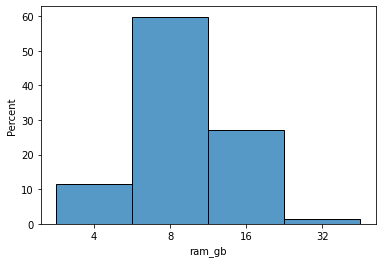

In [42]:
sns.histplot(data = data, x= 'ram_gb', stat = 'percent')

עדן - מסדר את הדאטה לדאטה נומרי לפי הרשימה ששיר הכינה לקראת עבודה של הnoisy data 

https://www.flipkart.com/automotive-accessories/vehicle-stereo-and-music-system/car-video-monitors/itw~brand/pr?sid=1mt%2Ceoe%2Coa4 
- להוריד ערכים מהעמודה של display size 
זו ההוכחה לכך שitw
זה מסך לרכב והוא לא רלוונטי לדאטה
